In [58]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf

pd.options.display.max_columns = None

In [59]:
df = pd.read_csv('Clean Datasets/All-Clean-Game-Logs.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,Date,Time,Season,Type,Opponent,Rank,Ranked Match,Conf,Rest Days,SRS,Result,Points For,Points Against,W,L,Home Game,Win Streak,Lose Streak,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,OPP FG,OPP FGA,OPP FG%,OPP 3P,OPP 3PA,OPP 3P%,OPP FT,OPP FTA,OPP FT%,OPP ORB,OPP TRB,OPP AST,OPP STL,OPP BLK,OPP TOV,OPP PF
0,2019-11-05,8:00p,2019-2020,REG,Nicholls State,NaN,False,Southland,0,-3.87,W,78,70,1,0,True,1,0,27,61,0.443,5,19,0.263,19,29,0.655,17,50,12,6,2,22,17,27,66,0.409,8,20,0.400,8,9,0.889,3,18,13,11,4,16,29
1,2019-11-08,9:00p,2019-2020,REG,Grand Canyon,NaN,False,WAC,3,-6.32,W,83,71,2,0,False,2,0,29,64,0.453,4,13,0.308,21,30,0.700,16,46,13,5,0,17,21,27,61,0.443,8,19,0.421,9,16,0.563,6,23,12,4,0,11,23
2,2019-11-10,9:00p,2019-2020,REG,Arizona,21.0,True,Pac-12,2,19.49,L,69,90,2,1,False,0,1,25,53,0.472,5,16,0.313,14,20,0.700,6,25,10,4,2,22,22,34,61,0.557,7,16,0.438,15,22,0.682,10,32,20,14,3,16,23
3,2019-11-18,8:00p,2019-2020,REG,Hawaii,NaN,False,Big West,8,-1.27,W,66,53,3,1,True,1,0,23,54,0.426,5,12,0.417,15,23,0.652,10,43,14,3,3,15,8,24,64,0.375,3,22,0.136,2,3,0.667,4,25,9,7,2,9,18
4,2019-11-20,9:00p,2019-2020,REG,The Citadel,NaN,False,Southern,2,-13.82,W,85,57,4,1,True,2,0,33,68,0.485,3,18,0.167,16,21,0.762,21,53,17,4,4,13,13,21,74,0.284,10,38,0.263,5,7,0.714,15,27,10,8,2,11,19


In [60]:
df = df.rename(columns={
    "Win Streak": "Win_Streak",
    "Lose Streak": "Lose_Streak",
    "Points Against": "Points_Against",
    "OPP FG%": "OPP_FG_Percent",
    "FG%": "FG_Percent"
})

In [61]:
df['Result'] = 1 * (df['Result'] == 'W')
df.head()

,Date,Time,Season,Type,Opponent,Rank,Ranked Match,Conf,Rest Days,SRS,Result,Points For,Points_Against,W,L,Home Game,Win_Streak,Lose_Streak,FG,FGA,FG_Percent,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,OPP FG,OPP FGA,OPP_FG_Percent,OPP 3P,OPP 3PA,OPP 3P%,OPP FT,OPP FTA,OPP FT%,OPP ORB,OPP TRB,OPP AST,OPP STL,OPP BLK,OPP TOV,OPP PF
0,2019-11-05,8:00p,2019-2020,REG,Nicholls State,NaN,False,Southland,0,-3.87,1,78,70,1,0,True,1,0,27,61,0.443,5,19,0.263,19,29,0.655,17,50,12,6,2,22,17,27,66,0.409,8,20,0.400,8,9,0.889,3,18,13,11,4,16,29
1,2019-11-08,9:00p,2019-2020,REG,Grand Canyon,NaN,False,WAC,3,-6.32,1,83,71,2,0,False,2,0,29,64,0.453,4,13,0.308,21,30,0.700,16,46,13,5,0,17,21,27,61,0.443,8,19,0.421,9,16,0.563,6,23,12,4,0,11,23
2,2019-11-10,9:00p,2019-2020,REG,Arizona,21.0,True,Pac-12,2,19.49,0,69,90,2,1,False,0,1,25,53,0.472,5,16,0.313,14,20,0.700,6,25,10,4,2,22,22,34,61,0.557,7,16,0.438,15,22,0.682,10,32,20,14,3,16,23
3,2019-11-18,8:00p,2019-2020,REG,Hawaii,NaN,False,Big West,8,-1.27,1,66,53,3,1,True,1,0,23,54,0.426,5,12,0.417,15,23,0.652,10,43,14,3,3,15,8,24,64,0.375,3,22,0.136,2,3,0.667,4,25,9,7,2,9,18
4,2019-11-20,9:00p,2019-2020,REG,The Citadel,NaN,False,Southern,2,-13.82,1,85,57,4,1,True,2,0,33,68,0.485,3,18,0.167,16,21,0.762,21,53,17,4,4,13,13,21,74,0.284,10,38,0.263,5,7,0.714,15,27,10,8,2,11,19


In [62]:
# Filter to create the training dataset (first 4 seasons)
df_train = df[df['Season'].isin(['2019-2020', '2020-2021', '2021-2022', '2022-2023'])]

# Filter to create the test dataset (most recent season)
df_test = df[df['Season'] == '2023-2024']

# Confirm split
print("Training Set:", df_train['Season'].unique())
print("Test Set:", df_test['Season'].unique())

Training Set: ['2019-2020' '2020-2021' '2021-2022' '2022-2023']
Test Set: ['2023-2024']


In [63]:
# Create a basic model predicting Result from the 5 highest correlated variables
results_1 = smf.logit('Result ~ Lose_Streak + Win_Streak + Points_Against + OPP_FG_Percent + FG_Percent', data=df_train).fit()
print(results_1.summary())

         Current function value: 0.000110
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  128
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                            5
Date:                Tue, 12 Nov 2024   Pseudo R-squ.:                  0.9998
Time:                        18:31:44   Log-Likelihood:              -0.014117
converged:                      False   LL-Null:                       -79.499
Covariance Type:            nonrobust   LLR p-value:                 1.641e-32
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.0696    346.669      0.087      0.931    -649.390     709.529
Lose_Streak      -23.5421    259.225     -0.091      

/Users/isaac/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/isaac/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/isaac/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/isaac/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

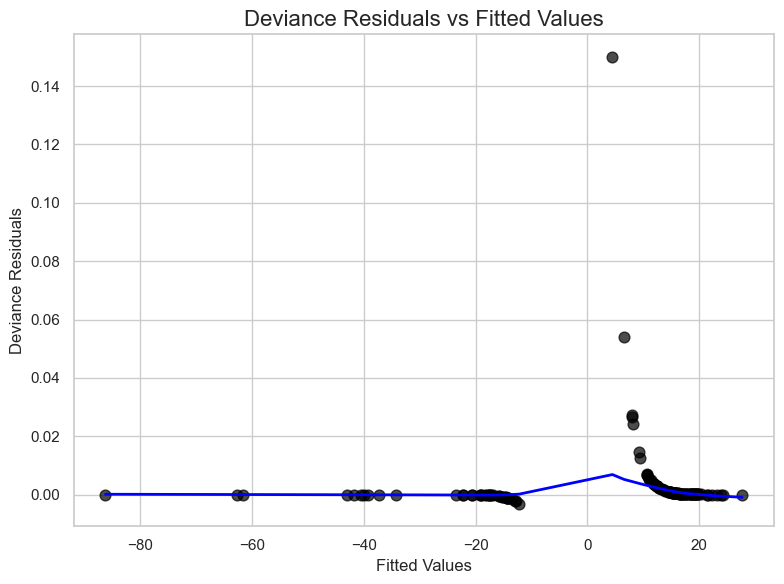

In [64]:
# Create fitted vs deviance residual plot to observe how accurate our model is
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.regplot(x=results_1.fittedvalues, y=results_1.resid_dev, 
            color='black', line_kws={'color':'blue', 'linewidth': 2},
            lowess=True, scatter_kws={'s': 60, 'alpha': 0.7, 'edgecolor': 'black'})

plt.title('Deviance Residuals vs Fitted Values', fontsize=16)
plt.xlabel('Fitted Values', fontsize=12)
plt.ylabel('Deviance Residuals', fontsize=12)

plt.tight_layout()
plt.show()